In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import bidi.algorithm
import arabic_reshaper
import adhtools.utils

In [4]:
fpath = '/media/sf_VBox_Shared/Arabic/Analyses/Fiqh_final/topicmodelling/'

In [5]:
document_topics = pd.read_csv(os.path.join(fpath, 'fiqh_light10_document_topics_20.csv'), index_col=0).sort_index()
df_topics = pd.read_csv(os.path.join(fpath, 'fiqh_light10_topics_20.csv'), index_col=0)
metadata = pd.read_csv(os.path.join(fpath, 'metadata-chapters.csv'), index_col=0)

In [5]:
#metadata = metadata.set_index('filename')

In [7]:
topic_names = df_topics['0'] +' '+ df_topics['1'] +' '+ df_topics['3']

In [7]:
# import glob
# book_files = glob.glob('/media/sf_VBox_Shared/Arabic/Fiqh/2018-11-13-Fiqh-stemmed-chapters/*.xml')
# c = adhtools.utils.corpus_wordlist(book_files, analyzer=False, field='proposed_root')
# chapter_lengths = {os.path.basename(b): len(l) for (b,l) in zip (book_files, c)}
# metadata['ChapterLength'] = pd.Series(chapter_lengths)

In [44]:
def split_fname(fname):
    splitted = fname.split('-')
    bookname = splitted[0]
    if len(splitted)>1:
        chapter = int(splitted[-1].split('.')[0])
    else:
        chapter = 0
    return (bookname, chapter)

In [9]:
document_topics.head()

0         1         2         3         4  \
0179MalikIbnAnas.Muwatta 0  0.020000  0.020000  0.020000  0.020000  0.020000   
                         1  0.000258  0.000258  0.000258  0.000258  0.000258   
                         2  0.001818  0.001818  0.001818  0.001818  0.001818   
                         3  0.001724  0.001724  0.001724  0.018966  0.001724   
                         4  0.000680  0.000680  0.000680  0.000680  0.000680   

                                   5         6         7         8         9  \
0179MalikIbnAnas.Muwatta 0  0.020000  0.020000  0.020000  0.020000  0.020000   
                         1  0.015762  0.000258  0.000258  0.000258  0.000258   
                         2  0.001818  0.001818  0.001818  0.020000  0.001818   
                         3  0.001724  0.001724  0.001724  0.001724  0.018966   
                         4  0.000680  0.000680  0.000680  0.000680  0.000680   

                                  10        11        12        13        14  \
0179MalikIbnAnas.Muwatta 0  0.020000  0.020000  0.220000  0.020000  0.020000   
                         1  0.000258  0.000258  0.633333  0.000258  0.000258   
                         2  0.001818  0.001818  0.765455  0.001818  0.001818   
                         3  0.001724  0.001724  0.536207  0.001724  0.001724   
                         4  0.000680  0.000680  0.531293  0.000680  0.000680   

                                  15        16        17        18        19  
0179MalikIbnAnas.Muwatta 0  0.020000  0.220000  0.220000  0.020000  0.020000  
                         1  0.000258  0.000258  0.346512  0.000258  0.000258  
                         2  0.001818  0.038182  0.147273  0.001818  0.001818  
                         3  0.001724  0.001724  0.398276  0.001724  0.001724  
                         4  0.000680  0.000680  0.456463  0.000680  0.000680

In [26]:
metadata['filename'] = metadata.filename.astype(str)

In [46]:
metadata_newind = metadata
metadata_newind.index = pd.MultiIndex.from_tuples(metadata.filename.map(split_fname))

In [47]:
new_ind = []
book_names = sorted(ind.levels[0])
for book in book_names:
    new_ind.extend(list(range(len(document_topics.loc[book]))))
new_ind = pd.MultiIndex.from_tuples(zip(ind.get_level_values(0), new_ind))

In [48]:
largest_topics = document_topics.idxmax(axis=1)
largest_topics = pd.concat([largest_topics,  metadata_newind['ChapterLength'], metadata_newind['Number_of_tokens']], axis=1)
#largest_topics.index = new_ind
largest_topics = largest_topics.reset_index()
largest_topics.columns = ['book', 'chapter', 'topic', 'length', 'total_length']
book_dict = {b: i for i,b in enumerate(book_names)}

In [49]:
metadata_newind['topic'] = largest_topics.set_index(['book', 'chapter'])['topic']
metadata_newind['topic_name'] = [topic_names[int(topic)] for topic in metadata_newind['topic']]

In [50]:
metadata_newind.to_csv(os.path.join(fpath, 'chapters_metadata_topics.csv'))

In [51]:
largest_topics['x1'] = largest_topics.groupby('book')['length'].transform(pd.Series.cumsum)
largest_topics['x0'] = largest_topics['x1'] - largest_topics['length']

In [52]:
largest_topics['total_length'] = largest_topics.groupby('book')['x1'].transform(lambda l: [l.max()]*len(l))

In [53]:
largest_topics['perc0'] = largest_topics['x0'] / largest_topics['total_length']
largest_topics['perc1'] = largest_topics['x1'] / largest_topics['total_length']

In [54]:
largest_topics[650:660]

,book,chapter,topic,length,total_length,x1,x0,perc0,perc1
650,0179MalikIbnAnas.Muwatta,650,12,104,146007,144172,144068,0.986720,0.987432
651,0179MalikIbnAnas.Muwatta,651,12,183,146007,144355,144172,0.987432,0.988685
652,0179MalikIbnAnas.Muwatta,652,12,92,146007,144447,144355,0.988685,0.989316
653,0179MalikIbnAnas.Muwatta,653,12,72,146007,144519,144447,0.989316,0.989809
654,0179MalikIbnAnas.Muwatta,654,12,78,146007,144597,144519,0.989809,0.990343
655,0179MalikIbnAnas.Muwatta,655,12,38,146007,144635,144597,0.990343,0.990603
656,0179MalikIbnAnas.Muwatta,656,12,106,146007,144741,144635,0.990603,0.991329
657,0179MalikIbnAnas.Muwatta,657,12,77,146007,144818,144741,0.991329,0.991857
658,0179MalikIbnAnas.Muwatta,658,12,359,146007,145177,144818,0.991857,0.994315
659,0179MalikIbnAnas.Muwatta,659,12,430,146007,145607,145177,0.994315,0.997260


In [55]:
color_list = sns.color_palette(n_colors=len(topic_names))

In [56]:
import matplotlib.colors

def style_row(row):
    topic_id = int(row.name)
    color = matplotlib.colors.to_hex(color_list[topic_id])
    attr = 'background-color: {}'.format(color)
    return [attr for v in  row]
df_topics.style.apply(style_row, axis=1)

,0,1,2,3,4,5,6,7,8,9
0,عقد,فل,عد,ولد,اذ,مهر,ام,نكاح,ول,زوج
1,اخذ,اذ,وقف,خمس,عشر,حول,صدق,ول,مال,زكا
2,سجد,سلام,ركع,وقت,اول,صل,ول,اذ,امام,صلا
3,امام,فل,اهل,قطع,اسلام,اذ,قتل,حد,مسلم,ول
4,خيار,مال,بااع,عقد,ول,قبض,اذ,ثمن,مشتر,بيع
5,ول,ظاهر,عدم,هذ,بخلاف,ام,اذ,فل,ذكر,اول
6,طهار,مسح,حيض,دم,نجاس,اذ,صلا,وض,ول,غسل
7,شافع,ابو,رجل,نب,حديث,مالك,عمر,رسول,اب,صل
8,ذكر,صحيح,اب,ظاهر,اول,اخبار,شيخ,روا,هذ,سلام
9,فل,يوسف,اصل,تعال,رحم,حنيف,حق,اب,اذ,هذ


In [22]:
def plot_bar_per_book(largest_topics, xmin_col, xmax_col, book_names, topic_names, legend=True):
    book_dict = {b: i for i,b in enumerate(book_names)}

    plt.figure(figsize=(25, np.floor(len(book_names)*0.5)))
    ax = plt.gca()
    for topic in range(len(topic_names)):
        topic_name = topic_names[topic]
        largest_topics_sub = largest_topics[largest_topics['topic']==str(topic)]
        color = color_list[topic] 


        y = [book_dict[s] for s in largest_topics_sub['book']]
        #x = largest_topics_sub['chapter']
        xmin = largest_topics_sub[xmin_col]
        xmax = largest_topics_sub[xmax_col]
        ax.hlines(y, xmin, xmax, #marker='s', edgecolors=None, 
                  colors=np.array((color,)), lw=10,
                   label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_name)))
    ax.set_yticks(np.arange(len(book_dict)))
    ax.set_yticklabels(book_names)
    ax.set_xlim(0, largest_topics[xmax_col].max())
    ax.set_ylim(-0.5, len(book_names))
    if legend:
        plt.legend(fontsize='large')
    ax.invert_yaxis()
    plt.show()

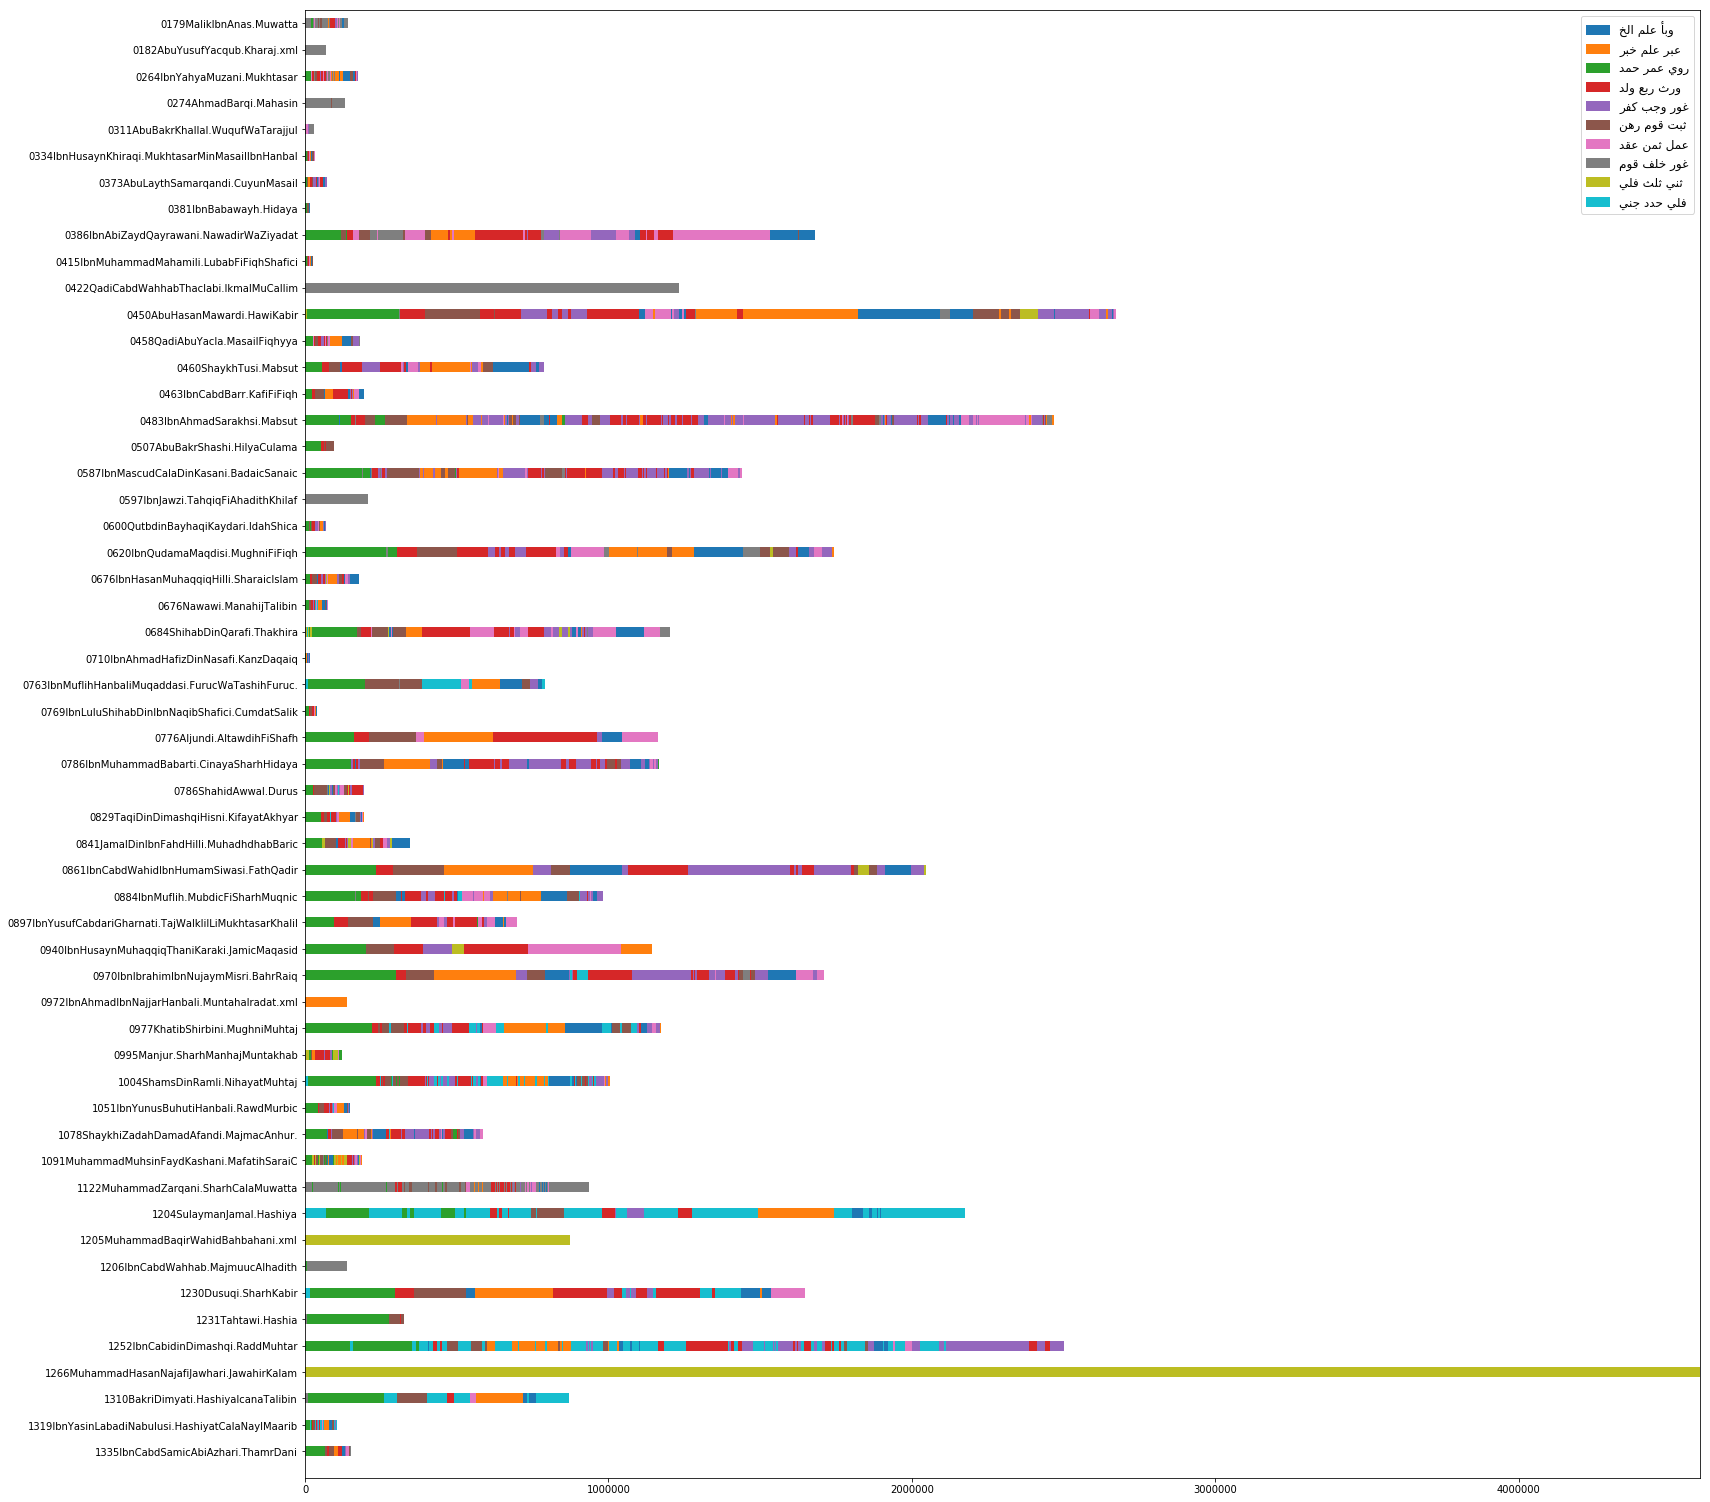

In [23]:
plot_bar_per_book(largest_topics, 'x0', 'x1', book_names, topic_names, legend=True)

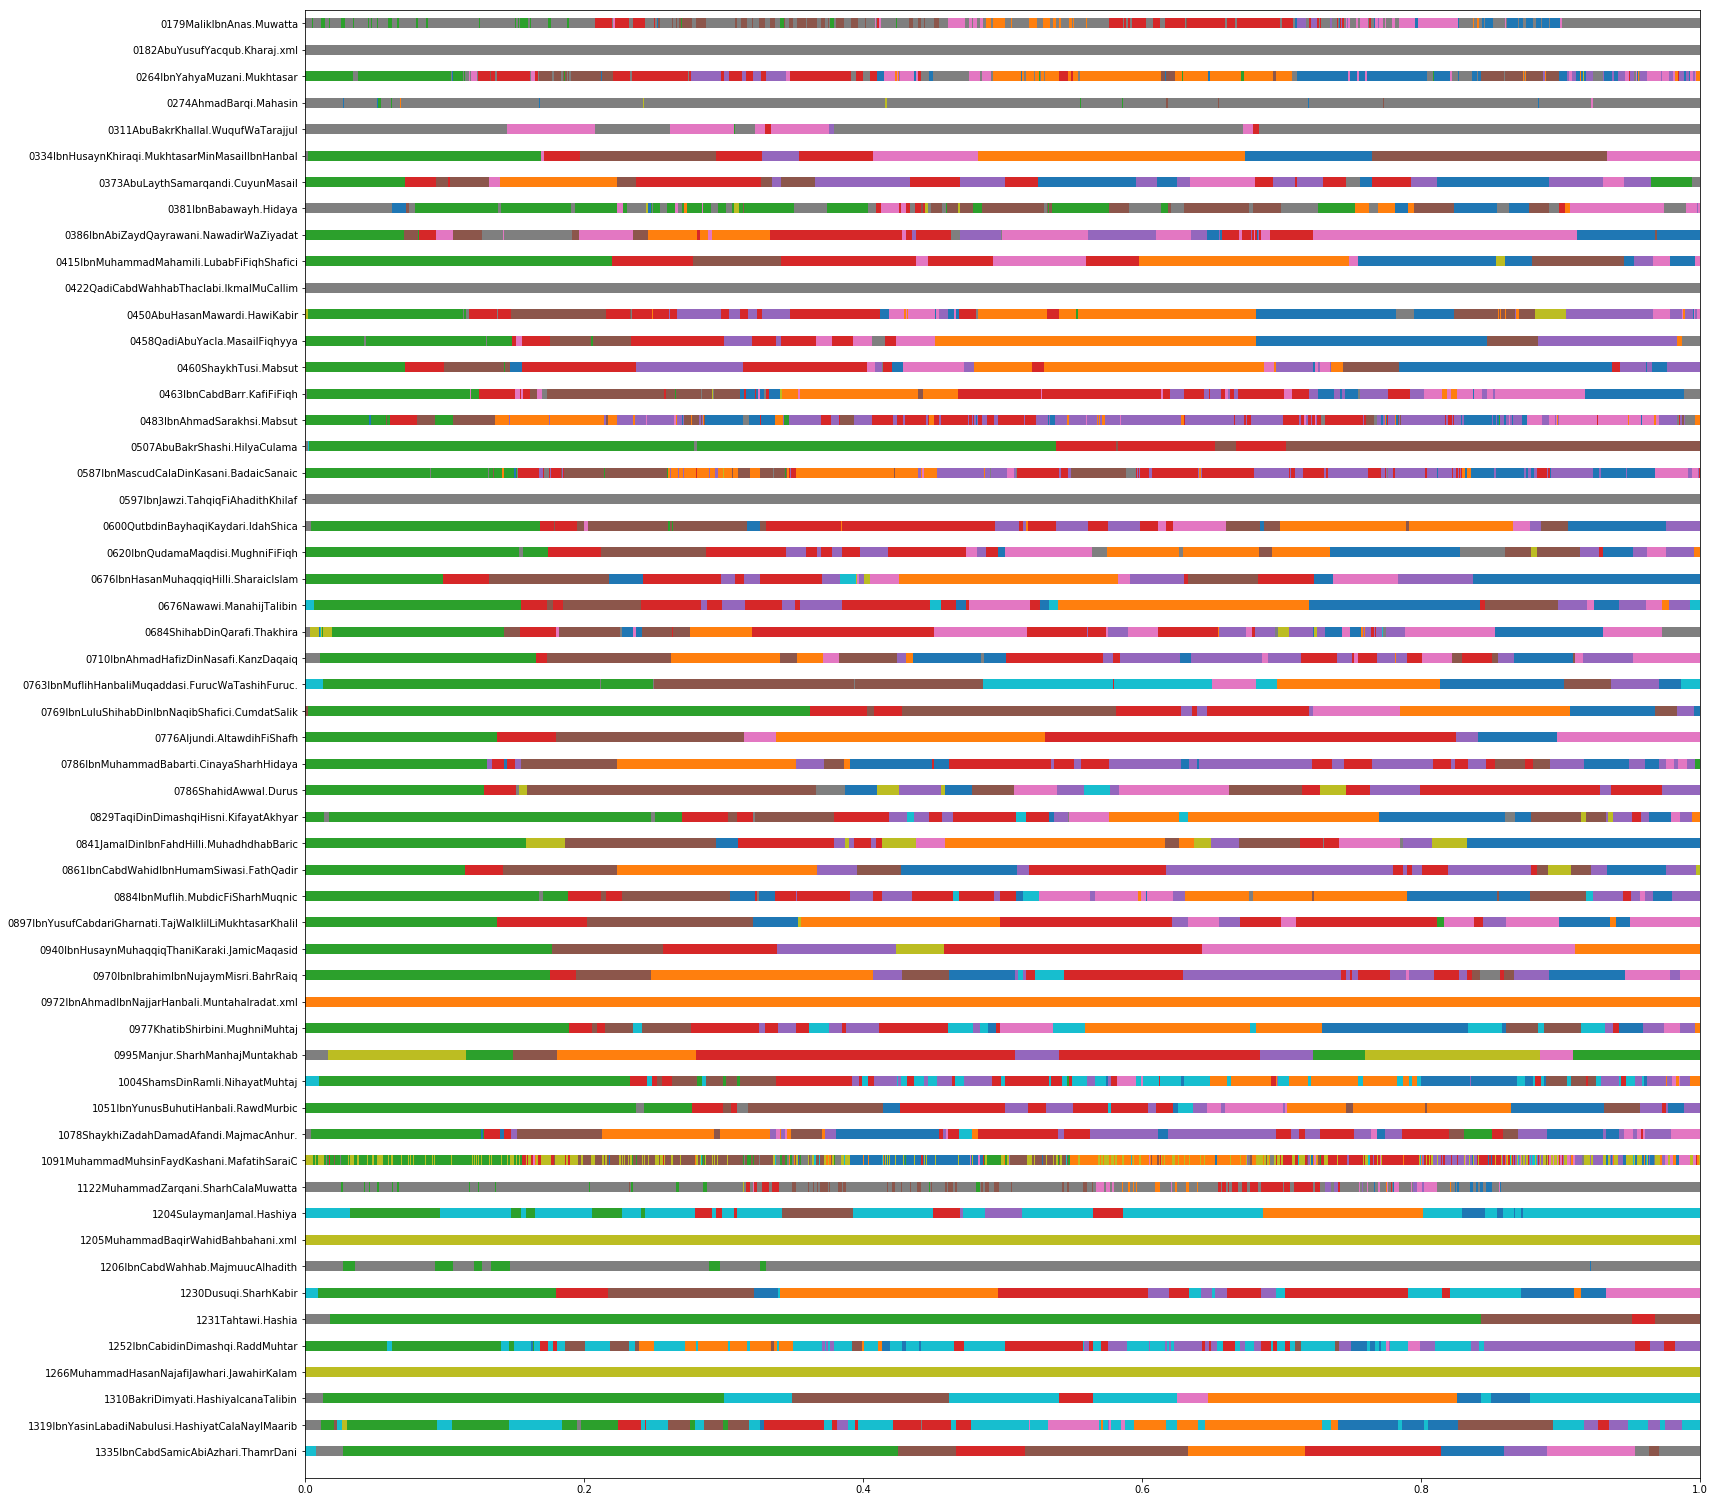

In [24]:
plot_bar_per_book(largest_topics, 'perc0', 'perc1', book_names, topic_names, legend=False)

مالكي


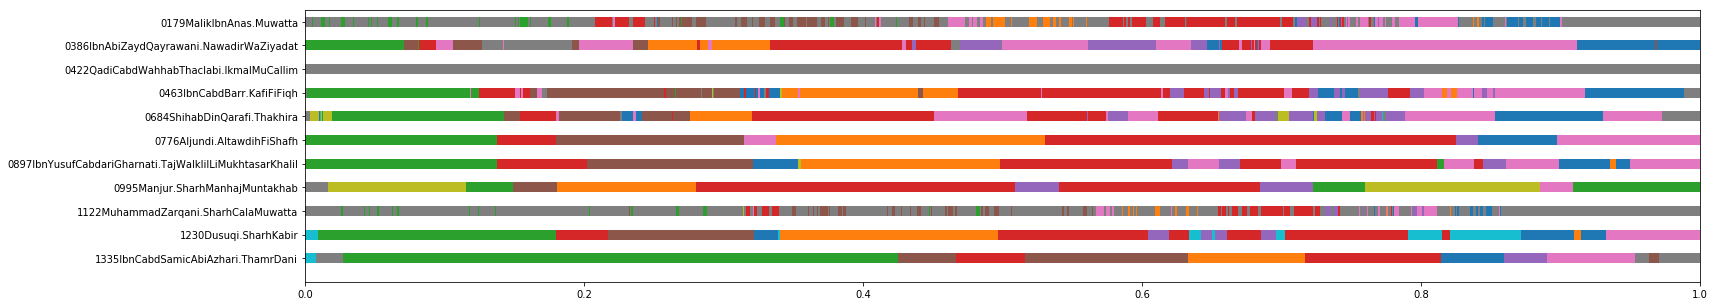

حنفي


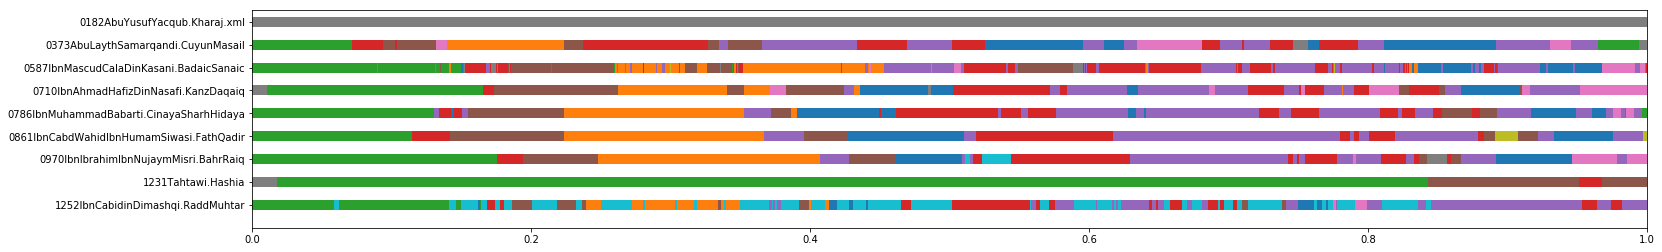

شافعي


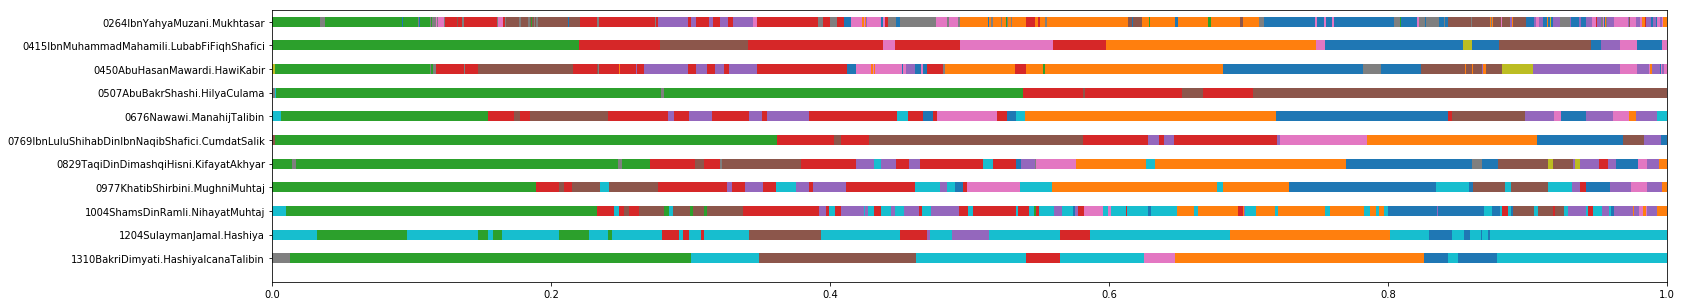

شيعي


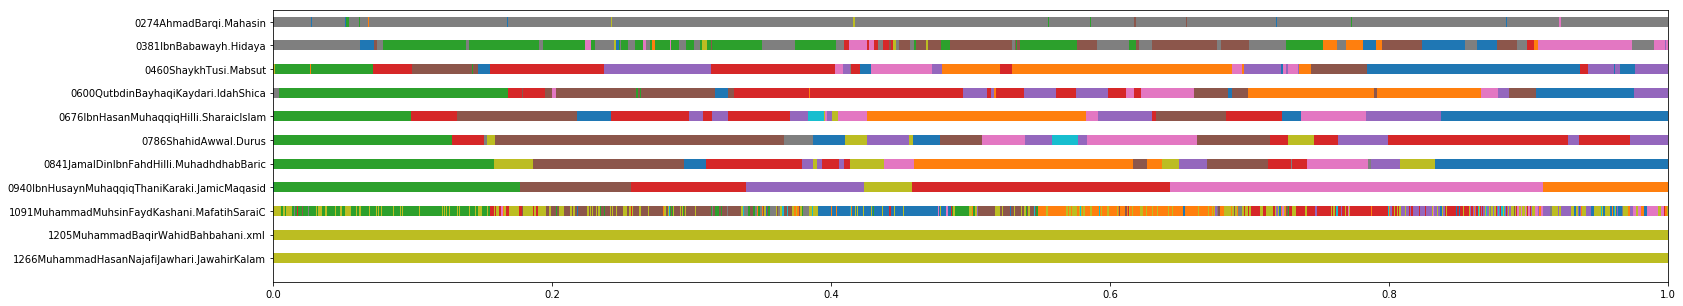

حنبلي


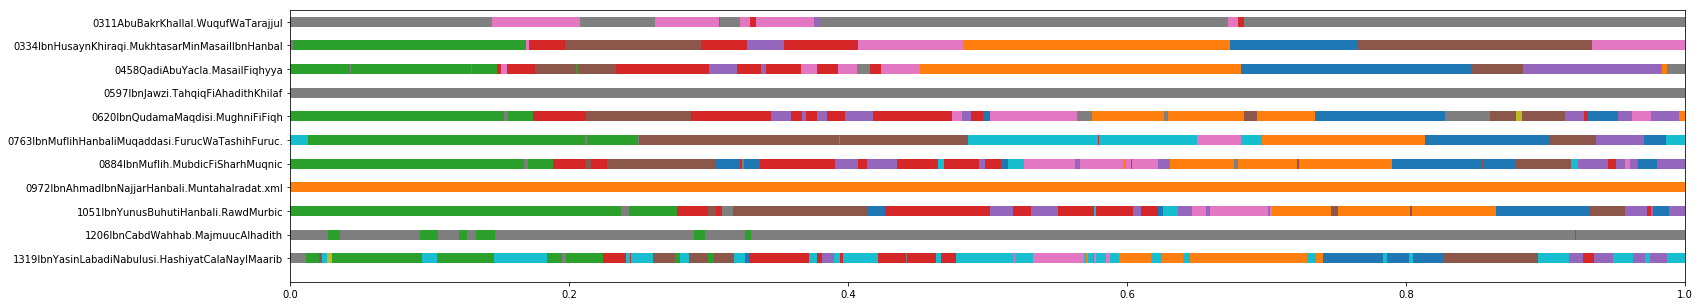

In [25]:
for subj in metadata.BookSUBJ.unique():
    if type(subj)==str:
        print(subj)
        ind_sub = metadata_newind[metadata_newind.BookSUBJ==subj].index.to_frame()
        ind_sub.columns = ['book', 'chapter']
        largest_topics_sub = largest_topics.merge(ind_sub, how='inner')
        plot_bar_per_book(largest_topics_sub, 'perc0', 'perc1', largest_topics_sub.book.unique(), topic_names, legend=False)

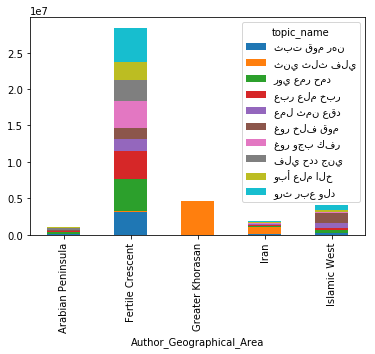

In [26]:
metadata_newind.groupby(['Author_Geographical_Area', 'topic_name'])['ChapterLength'].sum().unstack().plot(kind='bar', stacked=True)

In [27]:
def plot_bars_per_topic(df, topic_names, col1, col2='ChapterLength', aggfunc=sum, reshape_col1=False):
    plt.figure(figsize=(15,10))
    ax = plt.gca()
    values = df.groupby([col1, 'topic'])[col2].apply(aggfunc).sort_values()
    values = values.unstack().fillna(0)
    sorted_index = values.sum(axis=1).sort_values(ascending=False).index
    values = values.loc[sorted_index,:]
    ind0 = values.index
    ind1 = values.columns
    x = np.arange(len(ind0))
    last_y = np.repeat(0, len(ind0))
    for t in ind1:
        y = values[t]
        ax.bar(x, y, bottom=last_y, color=color_list[int(t)],
                label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_names[int(t)])))
        last_y = last_y+y
    if reshape_col1:
        xlabels = [bidi.algorithm.get_display(arabic_reshaper.reshape(l)) for l in ind0]
    else:
        xlabels = ind0
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=90)
    plt.legend()
    plt.show()

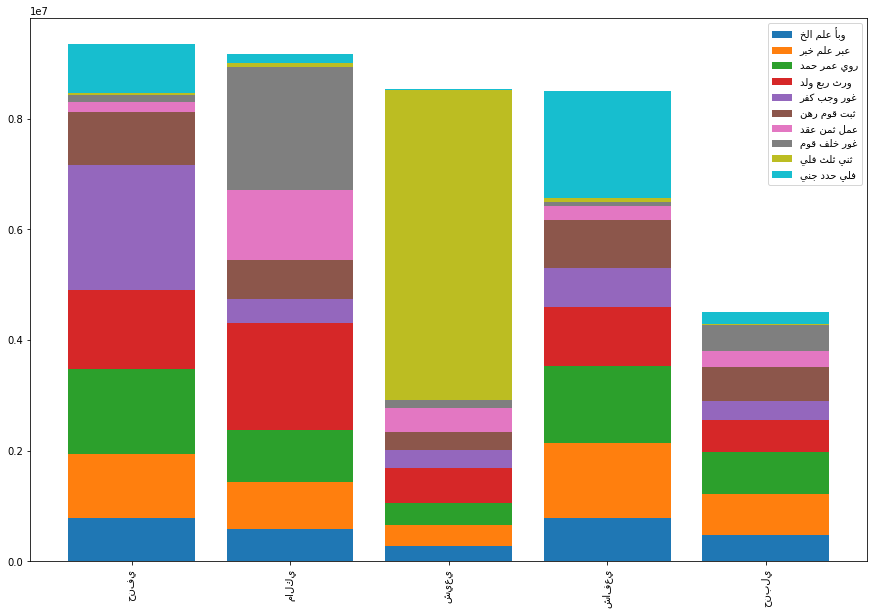

In [28]:
# Here we see the total number of tokens per topic
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ')

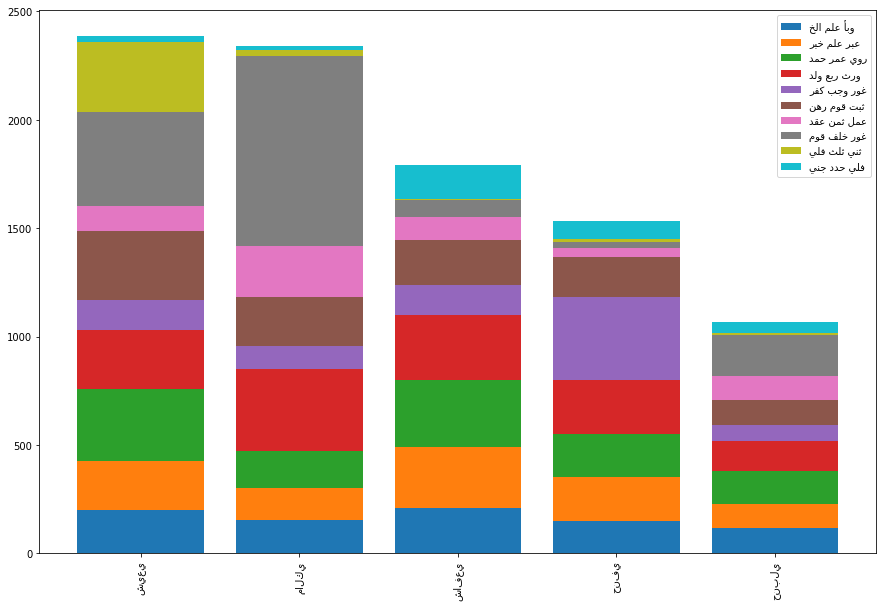

In [29]:
# Here we see only the number of chapters
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ', aggfunc=len)

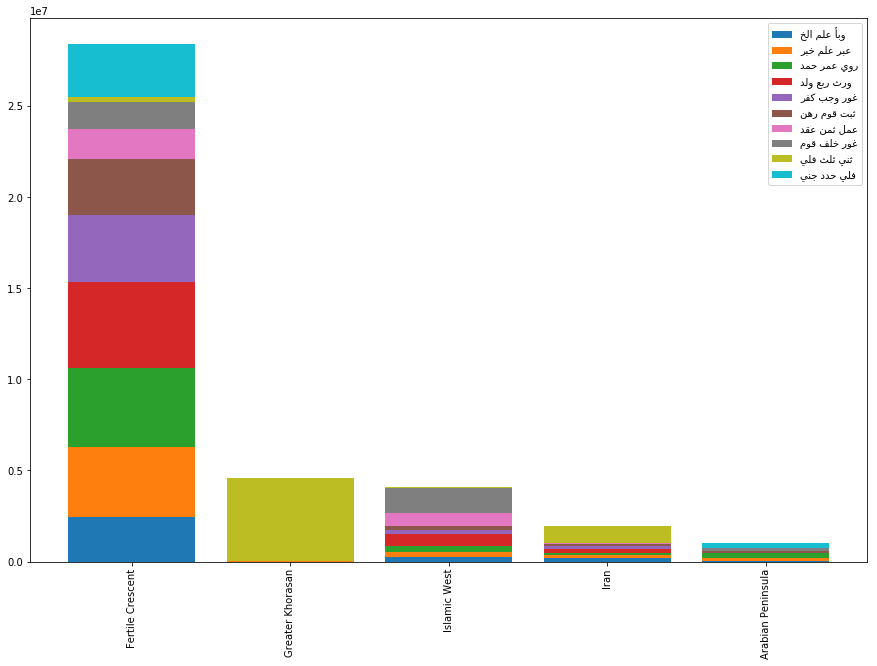

In [30]:
plot_bars_per_topic(metadata_newind, topic_names, 'Author_Geographical_Area')

In [45]:
df_topics.style.apply(style_row, axis=1)

,0,1,2,3,4,5,6,7,8,9
0,وبأ,علم,صحي,الخ,شرح,خلف,ظهر,ذكر,غور,اه
1,عبر,علم,ذكر,خبر,خلف,عرف,ظهر,سلم,غور,عدم
2,روي,عمر,نبأ,حمد,فى,رسل,أبن,صلي,حدث,سلم
3,ورث,ربع,كتب,ولد,موت,عتق,قسم,وصي,ثلث,أبن
4,غور,وجب,حلل,كفر,جزأ,حوج,يوم,أكل,صوم,حرم
5,ثبت,قوم,شهد,رهن,بيع,ملك,قرر,دعا,قضي,حقق
6,عمل,ثمن,شرط,عقد,أخذ,أجر,ملك,جوز,شري,بيع
7,غور,خلف,طهر,قوم,سلم,ركع,أمم,غسل,سجد,صلي
8,ثني,ثلث,عدا,فلي,ولد,مرأ,وطأ,نكح,زوج,طلق
9,فلي,حدد,قوم,جني,سلم,حكم,ودي,قطع,شهد,قتل


In [46]:
# Print volume and chapter names per topic
for topic in range(len(topic_names)):
    meta_sub = metadata_newind[metadata_newind['topic']==str(topic)]
    print(topic)
    print("Volumes:")
    display(meta_sub.VolumeTitle.value_counts().head(10).index)
    print("Chapters:")
    display(meta_sub.ChapterTitle.value_counts().head(10).index)
    print('\n')

0
Volumes:


Index(['كتاب مفاتيح الحسبة الحدود', 'كتاب الحدود', 'كتاب باب إغماض الميت',
       'كتاب الجنايات', 'كتاب الديات', '-', 'كتاب السير', 'كتاب الجهاد',
       'كتاب الشهادات', 'كتاب العقول باب ذكر العقول'],
      dtype='object')

Chapters:


Index(['-', 'باب موجبات الدية', 'باب القسامة', 'باب حد القذف',
       'باب قاطع الطريق', 'باب موجبات الدية والعاقلة والكفارة', 'باب',
       'بابتداء الجناية ديتين وما',
       'فصلفي شروط الإمام الأعظم وبيان طرق الإمامة', 'باب كفارة القتل'],
      dtype='object')



1
Volumes:


Index(['كتاب النكاح', 'كتاب الطلاق', 'كتاب مفاتيح المناكح المواليد',
       'كتاب باب إغماض الميت', 'كتاب الوكالة', '-', 'كتابالطلاق', 'كتابالنكاح',
       'كتاب النكاح من قدر أن يتزوج وبه شهوة يستحب له التزوج وليجتنب من لا أصل لها ولا عقل ولا دين ولا يجوز أن يتزوج بالناصبة والمنحرفة عن الحق ولا بأس بالمستضعفة ومن لا تعرف نصبا ولا يجوز تزويج المؤمنة من مخالفها في الاعتقاد ويختار البكر والولود ويجتنب العقيم ويكره التزويج بالأكراد والسودان إلا النوبة وبالمجنونة ويجوز أن يطأ جاريته المجنونة إلا أنه لا يطلب ولدها ولا بأس أن يتزوج بالتائبة عن الفجور والكفاءة بالإيمان وراد المؤمن المرضي غير المتهتك لفقر أو ضعة نسب عاص لله تعالى ويكره للرجل أن يزوج ابنته متظاهرا بفسق ومن أراد العقد على امرأة فلا بأس أن ينظر إلى وجهها وكفيها وإلى مشيها وجسدها من فوق ثيابها وإن لم يرد العقد لم يجز ذلك وكذا إذا أراد شراء أمة جاز أن ينظر إلى محاسنها وشعرها بلا ريبة وتلذذ والنظر إلى ما سوى الوجه والكفين من الأجانب محظور إلا لضرورة كالطبيب ومتحمل الشهادة على امرأة والحاكم عليها ومعاملها يجوز أن يروها وجهها وكذا الم

Chapters:


Index(['-', 'باب الخيار في النكاح', 'باب الاستبراء',
       'باب الخيار والاعفاف ونكاح العبد وجد أحد زوجين', 'باب الرجعة',
       'باب الشك في الطلاق', 'باب الخلع', 'باب الحضانة',
       'بابجامع لمسائل مختلفة في', 'بابه فقال من هذه فقالت'],
      dtype='object')



2
Volumes:


Index(['كتاب الصلاة', '-', 'كتاب مفاتيح الصلاة', 'كتاب الطهارة', 'كتابالصلاة',
       'كتاب الصلاة الصلاة في اللغة هي الدعاء لقوله تعالى وصل عليهم إن',
       'كتاب الصلاة الصلاة في الشرع أفعال مخصوصة من قيام وركوع وسجود مع أذكار مخصوصة ولها مقدمات يجب على المكلف بها معرفتها وهي الطهارة وأعداد الصلاة والوقت والقبلة واللباس والمكان والمسجد وستر العورة وتطهير الثوب والبدن والمندوب من المقدمة الأذان والإقامة الفصل الأول الصلاة ضربان مفروض ومسنون فالمفروض قسمان ما يجب بإطلاق الشرع وما يجب عند سبب إما من جهة المكلف كصلاة النذر وإما غير متعلق به كصلاة الكسوف والعيدين وما يجب بالإطلاق فالصلوات الخمس وشرائط وجوبها البلوغ وكمال العقل لأن غير البالغ لا تجب الصلاة عليه وإنما يؤخذ به بعد ست سنين تمرينا وتعليما وغير كامل العقل لا تجب الصلاة عليه وإن بلغ ومن شرط وجوبها على المرأة أن تكون طاهرا من حيض الفصل الثاني الصلاة قسمان سفري وحضري ففرائض الحضر سبع عشرة ركعة الظهر والعصر والعشاء الآخرة كل واحدة أربع والمغرب ثلاث والفجر ركعتان ونوافل الحضر أربع وثلاثون ثمان للظهر وثمان للعصر وأربع للمغرب وركعتان

Chapters:


Index(['-', 'فصل', 'باب التيمم', 'باب الحيض', 'باب صلاة العيدين', 'باب',
       'باب المسح على الخفين', 'باب صلاة الجمعة', 'باب صلاة الاستسقاء',
       'باب صلاة الخوف'],
      dtype='object')



3
Volumes:


Index(['كتاب الزكاة', 'كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع',
       'كتاب باب إغماض الميت', 'كتاب البيع', 'كتاب البيوع', 'كتاب المزارعة',
       'كتاب الجمعة وغيرها من أمرها', '-', 'كتاب الصرف في', 'كتاب المضاربة'],
      dtype='object')

Chapters:


Index(['-', 'باب', 'باب السلم', 'باب الضمان شرط الضامن الرشد', 'باب الضمان',
       'بابفي',
       'الفصل الثاني لا يجوز التصرف لولي الطفل مع شيء من ملكه إلا للغبطة والمصلحة له أو لحاجة شديدة من الطفل إلى نفقته وكسوته ولا وجه له سواه ويجوز له شراؤه ويجوز له أن يتصرف في ماله بالتجارة وشرى العقار نظرا له وإذا بلغ الصبي وقد باع وليه شيئا من أملاكه فادعى أنه باعه بلا حاجة ولا غبطة فالقول قول الولي إن كان أباه أو جده وقول الصبي إن كان الولي وصيا أو أمينا وعليهما البينة ويقبل قول الأب أو الجد له أنه أنفق على الصبي أو على عقاره بلا بينة ولا يقبل من الوصي إلا ببينة ويستحق الولي أجرة مثله في القيام بأمر اليتيم ومتى تصرف الولي على وجه لا حظ لليتيم فيه بطل ولم يستحق أجرا ولا يصح بيع الصبي وشراؤه إلا بعد أن يبلغ عشر سنين فصاعدا ويكون رشيدا للأب الفقير أن يأخذ من مال الولد الغني نفقته بلا إسراف إذا لم ينفق',
       'الفصل العشرون يكره حبس الأقوات الستة الحنطة والشعير والتمر والزبيب والسمن والملح إذا لم يوجد ذلك إلا عند إنسان بعينه وأضر ذلك بالمسلمين ويجب إذا على السلطان إجبار صاحبه على بيعه من غير



4
Volumes:


Index(['كتاب الدعوى', 'كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع',
       'كتاب المكاتب', 'كتاب الإقرار', 'كتاب الرهن', 'كتاب الكفالة',
       'كتاب الوكالة', 'كتاب باب إغماض الميت', 'كتاب المأذون الكبير',
       'كتاب العتاق'],
      dtype='object')

Chapters:


Index(['-', 'باب الحوالة', 'باب الضمان', 'باب الرجل يرى الرجل يقتل أباه',
       'فصل وأما شرائط الركن فأنواع', 'باب إقرار المريض', 'باب دعوى النسب',
       'باب عزل الوكيل', 'باب الرجوع عن الشهادة',
       'بابا أو ذهبا فصاغه حليا أو صفرا فضربه إناء أو غزلا فنسجه'],
      dtype='object')



5
Volumes:


Index(['كتاب الحج', 'كتاب مفاتيح الحج', '-', 'كتاب المناسك', 'كتاب الأيمان',
       'كتاب باب إغماض الميت', 'كتاب الصيام', 'كتاب مفاتيح المطاعم المشارب',
       'كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت',
       'كتاب الحج باب الغسل للإهلال'],
      dtype='object')

Chapters:


Index(['-', 'باب', 'باب الاعتكاف', 'باب صوم التطوع', 'باب الذكاة',
       'باب زكاة الفطر', 'دعوى الغلط في القسمة', 'باب النذر', 'باب الإحصار',
       'باب المواقيت'],
      dtype='object')



6
Volumes:


Index(['كتاب الفرائض', '-', 'كتاب باب إغماض الميت', 'كتاب الوصايا',
       'كتاب الفرائض والمواريث', 'كتاب العتق',
       'كتاب الفرائض والمواريث روي عن النبي صلى الله عليه وآله أنه قال',
       'كتاب مفاتيح الفرائض المواريث', 'كتاب',
       'كتاب المكاتب باب القضاء في المكاتب وحدثني عن مالك عن'],
      dtype='object')

Chapters:


Index(['-', 'باب',
       'بابفيه ذكر شراء كسور السؤال وفى الزبل يجتمع فى أرض حبس هل يعمل به طوب من',
       'باب الولاء', 'بابفي', 'باب ميراث', 'باب التدبير', 'باب العصبات',
       'باب القسمة', 'الباب الثامن والعشرون في الحلى'],
      dtype='object')



7
Volumes:


Index(['-', 'كتاب', 'كتاب باب إغماض الميت', 'كتاب الحج باب',
       'كتاب الحج باب الغسل للإهلال', 'كتاب الزكاة', 'كتاب وقوت الصلاة',
       'كتاب الطهارة باب العمل في الوضوء باب العمل في الوضوء حدثني',
       'كتاب الطلاق باب ما جاء في البتة بسم الله الرحمن الرحيم كتاب',
       'كتاب قصر الصلاة في السفر باب الجمع بين الصلاتين في الحضر'],
      dtype='object')

Chapters:


Index(['-', 'باب', 'باب ما جاء في', 'باب ما',
       'باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم',
       'باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم',
       'ثواب', 'باب ما جاء',
       'باب الحاق النسب باب إلحاق النسب عن عائشة رضي الله عنها أنها قالت إن رسول',
       'باب الدعاوى والبينات باب الدعاوى والبينات عن ابن عباس رضي الله عنهما أن'],
      dtype='object')



8
Volumes:


Index(['كتاب مفاتيح الصلاة', 'كتاب مفاتيح المناكح المواليد',
       'كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع',
       'كتاب مفاتيح الزكاة', '-', 'كتاب مفاتيح الحسبة الحدود',
       'كتاب مفاتيح القضاء الشهادات',
       'كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت',
       'كتاب مفاتيح الحج', 'كتاب مفاتيح المعايش المكاسب'],
      dtype='object')

Chapters:


Index(['-', 'مفتاح أحكام قضاء الحج الواجب عن الميت',
       'مفتاح ما يتحقق به الاستطاعة', 'مفتاح زكاة القرض على المقترض',
       'مفتاح ما يشترط فيها حكم لزومها جوازها', 'الجنائز إذا احتضر الرجل',
       'مفتاح اشتراط الإسلام في الشاهد', 'مفتاح ما يشترط مراعاته في الجماعة',
       'مفتاح حكم ما لو أبهم العوض', 'مفتاح ما يطلق عليه الخمر'],
      dtype='object')



9
Volumes:


Index(['كتاب الصلاة', '-', 'كتاب الحج', 'كتاب الوقف', 'كتاب النكاح',
       'كتاب القضاء', 'كتاب الشهادات', 'كتاب الوصايا', 'كتاب الزكاة',
       'كتاب الرهن'],
      dtype='object')

Chapters:


Index(['-', 'باب البغاة',
       'بابا عن غير مميز كطير وعبد مجنون وهذا أعم وأولى من قوله ولو فتح قفصا',
       'باب الضمان', 'باب موت المكاتب وعجزه وموت المولى', 'باب ما يبطلها',
       'باب دعوى الدم', 'باب الاستبراء وغيره', 'باب', 'فصلفي الإيصاء'],
      dtype='object')

0 كتاب باب إغماض الميت
1 كتاب الصلاة
2 كتاب الزكاة
3 كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع
4 كتاب مفاتيح الصلاة
5 كتاب
6 كتاب النكاح
7 كتاب الحج
8 كتاب مفاتيح المناكح المواليد
9 كتاب مفاتيح الحسبة الحدود
10 كتاب الطلاق
11 كتاب الوكالة
12 كتاب مفاتيح الحج
13 كتاب الطهارة
14 كتاب الفرائض
15 كتاب البيع
16 كتاب الحدود
17 كتاب الدعوى
18 كتاب الجمعة وغيرها من أمرها
19 كتاب البيوع
20 كتاب الحج باب
21 كتاب الحج باب الغسل للإهلال
22 كتاب الأيمان
23 كتاب الوصايا
24 كتاب الجنايات
25 كتاب الشهادات
26 كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت
27 كتاب العتق
28 كتاب المزارعة


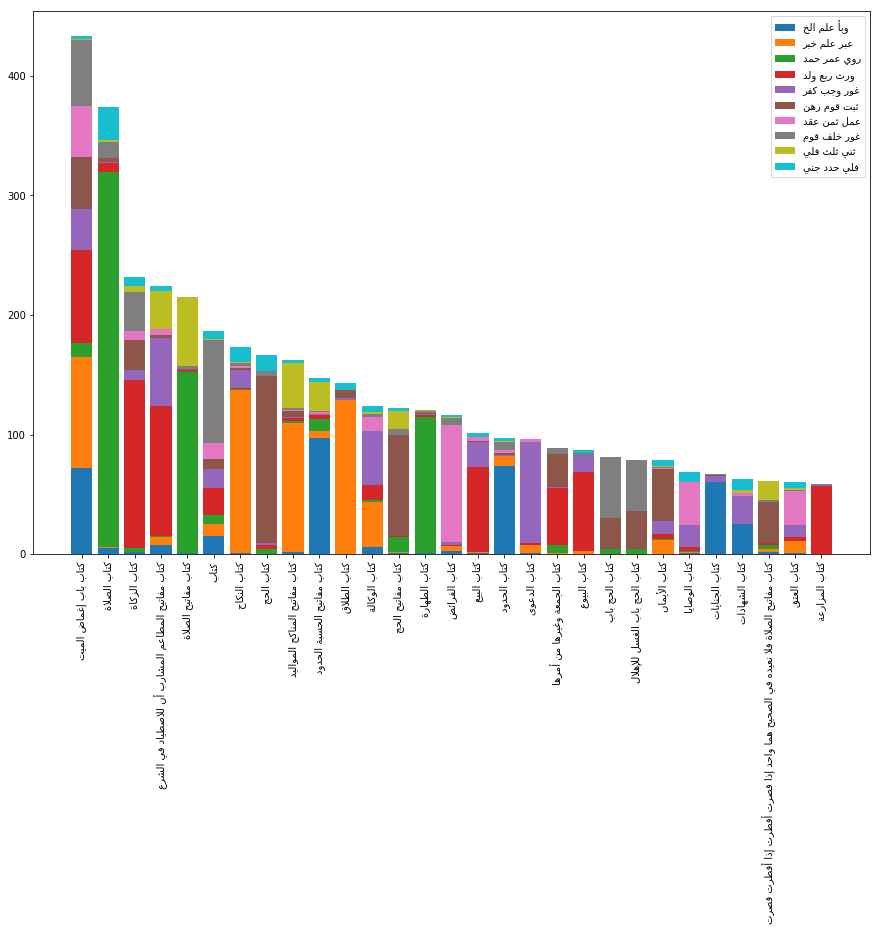

In [36]:
# The 30 most common volume names
voltitles = metadata_newind['VolumeTitle'].value_counts().head(30)[1:].index
for i,v in enumerate(voltitles):
    print(i,v)
meta_sub = metadata_newind[metadata_newind.VolumeTitle.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'VolumeTitle', reshape_col1=True, aggfunc=len)

0 باب
1 فصل
2 باب الضمان
3 باب ما جاء في
4 باب القسمة
5 باب ما
6 بابفي
7 باب صلاة الاستسقاء
8 باب الضمان شرط الضامن الرشد
9 باب البغاة
10 باب الحيض
11 باب الاستبراء
12 الفصل الثاني لا يجوز التصرف لولي الطفل مع شيء من ملكه إلا للغبطة والمصلحة له أو لحاجة شديدة من الطفل إلى نفقته وكسوته ولا وجه له سواه ويجوز له شراؤه ويجوز له أن يتصرف في ماله بالتجارة وشرى العقار نظرا له وإذا بلغ الصبي وقد باع وليه شيئا من أملاكه فادعى أنه باعه بلا حاجة ولا غبطة فالقول قول الولي إن كان أباه أو جده وقول الصبي إن كان الولي وصيا أو أمينا وعليهما البينة ويقبل قول الأب أو الجد له أنه أنفق على الصبي أو على عقاره بلا بينة ولا يقبل من الوصي إلا ببينة ويستحق الولي أجرة مثله في القيام بأمر اليتيم ومتى تصرف الولي على وجه لا حظ لليتيم فيه بطل ولم يستحق أجرا ولا يصح بيع الصبي وشراؤه إلا بعد أن يبلغ عشر سنين فصاعدا ويكون رشيدا للأب الفقير أن يأخذ من مال الولد الغني نفقته بلا إسراف إذا لم ينفق
13 باب التيمم
14 باب القسامة
15 باب الخيار في النكاح
16 باب صوم التطوع
17 باب الخيار والاعفاف ونكاح العبد وجد أحد زوجين
18 باب 

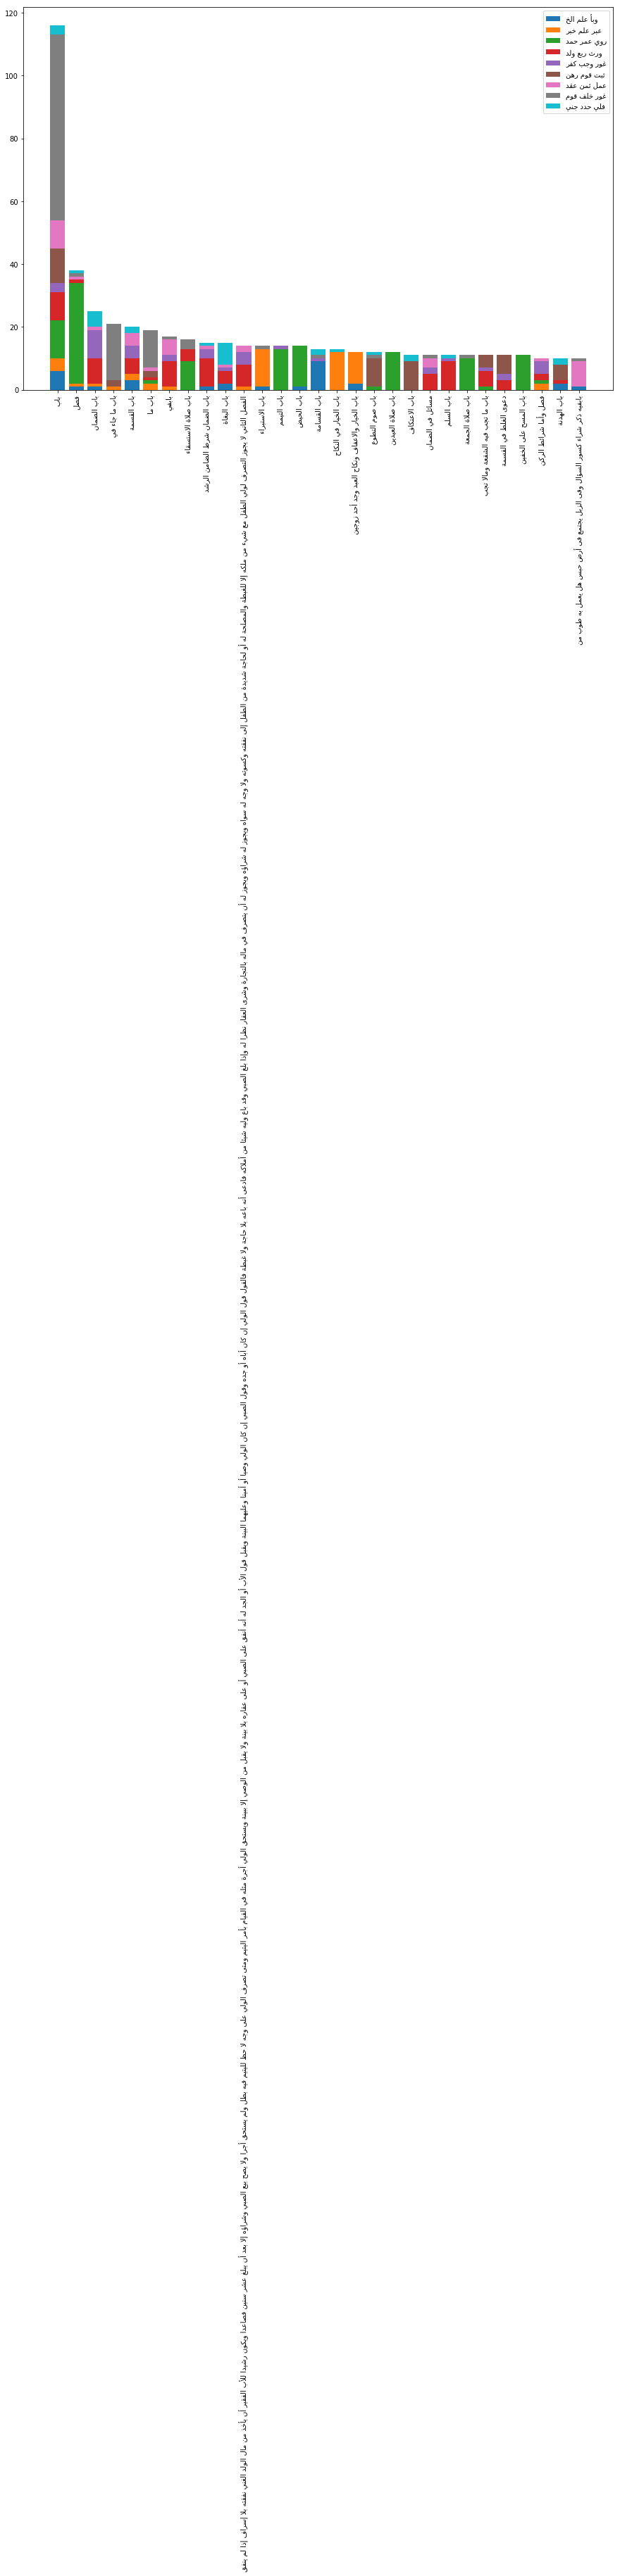

In [32]:
# The 30 most common chapter names
voltitles = metadata_newind['ChapterTitle'].value_counts().head(30)[1:].index
for i, v in enumerate(voltitles):
    print(i, v)
meta_sub = metadata_newind[metadata_newind.ChapterTitle.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'ChapterTitle', reshape_col1=True, aggfunc=len)